In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import warnings 
warnings.filterwarnings("ignore")
import sklearn

# Red wine quality prediction

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Red%20Wine/winequality-red.csv")
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In this data we have total 12 columns from which one is output/target variable as (quality) and the remaining columns are input 
variables. Model to be built as per the quality of red wine and as per the problem statement quality parameter is equal to 7 and
above is a good qaulity wine and below 7 to be considerd as bad qaulity wine.

In [3]:
df.shape

(1599, 12)

In [4]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [5]:
df.sample(15)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1049,9.3,0.500,0.36,1.8,0.084,6.0,17.0,0.99704,3.27,0.77,10.8,6
260,7.9,0.330,0.23,1.7,0.077,18.0,45.0,0.99625,3.29,0.65,9.3,5
811,12.9,0.500,0.55,2.8,0.072,7.0,24.0,1.00012,3.09,0.68,10.9,6
428,9.1,0.520,0.33,1.3,0.070,9.0,30.0,0.99780,3.24,0.60,9.3,5
1058,9.9,0.530,0.57,2.4,0.093,30.0,52.0,0.99710,3.19,0.76,11.6,7
377,9.4,0.270,0.53,2.4,0.074,6.0,18.0,0.99620,3.20,1.13,12.0,7
401,7.7,0.260,0.30,1.7,0.059,20.0,38.0,0.99490,3.29,0.47,10.8,6
1333,9.1,0.775,0.22,2.2,0.079,12.0,48.0,0.99760,3.18,0.51,9.6,5
890,7.2,0.340,0.24,2.0,0.071,30.0,52.0,0.99576,3.44,0.58,10.1,5
117,7.8,0.560,0.12,2.0,0.082,7.0,28.0,0.99700,3.37,0.50,9.4,6


In [6]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

As we can check there is no null value present in the data same is checked using isnull and sample.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Data type is also shown right there is no whitespace present. hence input have float and output is intger as value is single digit.

In [8]:
df.nunique()

fixed acidity            96
volatile acidity        143
citric acid              80
residual sugar           91
chlorides               153
free sulfur dioxide      60
total sulfur dioxide    144
density                 436
pH                       89
sulphates                96
alcohol                  65
quality                   6
dtype: int64

In [9]:
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

With help of value counts we can see that there are total 06 parameters in quality.

<Axes: >

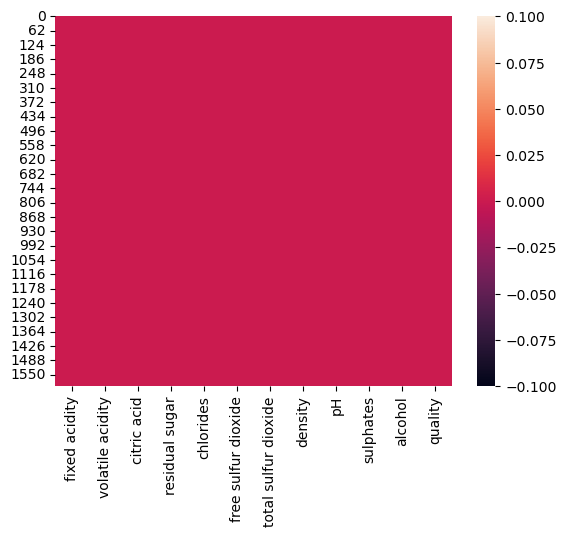

In [10]:
sns.heatmap(df.isnull())

is there any null value present in that data also checked with an heatmap.

In [11]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


fixed acidity              Axes(0.125,0.53;0.110714x0.35)
volatile acidity        Axes(0.257857,0.53;0.110714x0.35)
citric acid             Axes(0.390714,0.53;0.110714x0.35)
residual sugar          Axes(0.523571,0.53;0.110714x0.35)
chlorides               Axes(0.656429,0.53;0.110714x0.35)
free sulfur dioxide     Axes(0.789286,0.53;0.110714x0.35)
total sulfur dioxide       Axes(0.125,0.11;0.110714x0.35)
density                 Axes(0.257857,0.11;0.110714x0.35)
pH                      Axes(0.390714,0.11;0.110714x0.35)
sulphates               Axes(0.523571,0.11;0.110714x0.35)
alcohol                 Axes(0.656429,0.11;0.110714x0.35)
quality                 Axes(0.789286,0.11;0.110714x0.35)
dtype: object

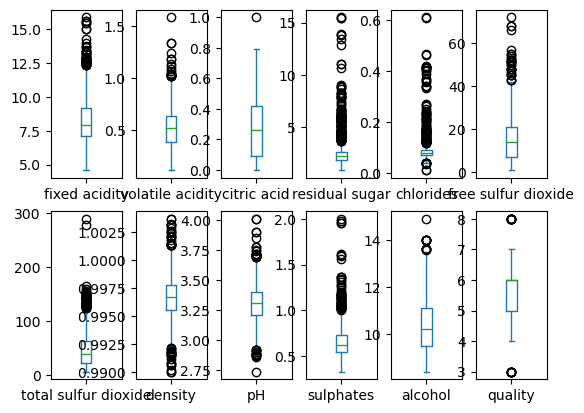

In [12]:
df.plot(kind="box", subplots=True, layout=(2,6))

with the help of boxplot we can see that every column have outliers present.

<Axes: >

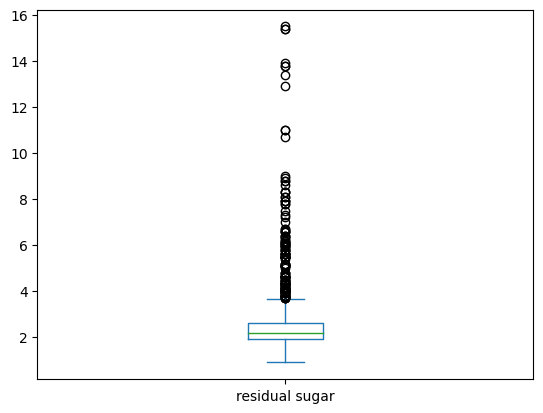

In [13]:
df['residual sugar'].plot.box()

to check how much outliers are present in this particular column(residual sugar) which gives large and clear to avoid overlapping.

<Axes: >

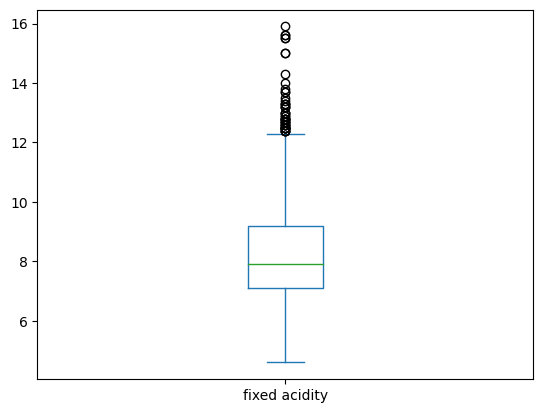

In [14]:
df['fixed acidity'].plot.box()

to check how much outliers are present in this particular column(fixed acidity) which gives large and clear to avoid overlapping.

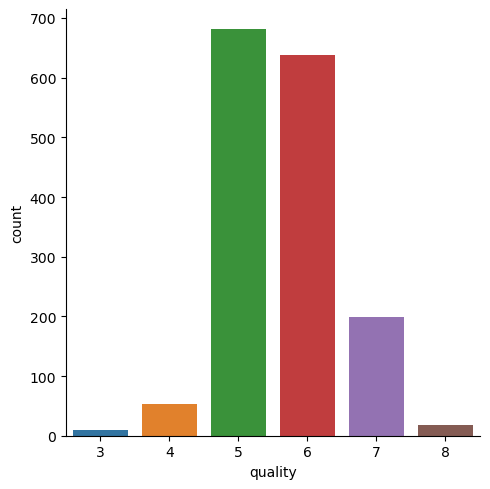

In [15]:
sns.catplot(x="quality", data = df, kind = "count" )

this bar plot is giving better representation of value in each parameter in wine quality as we can see 5 and 6 have highest count.

<Axes: xlabel='quality', ylabel='fixed acidity'>

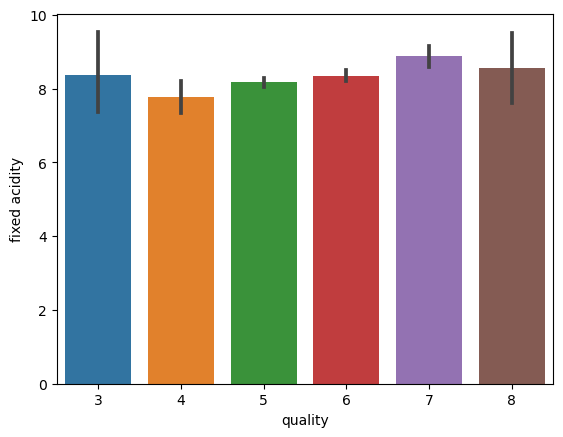

In [16]:
sns.barplot(x="quality", y="fixed acidity", data = df)

<Axes: xlabel='quality', ylabel='alcohol'>

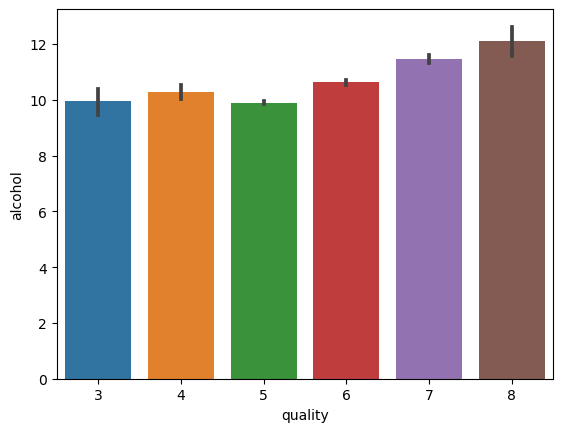

In [17]:
sns.barplot(x = "quality", y = "alcohol", data=df)

this comparison give better quality of wine, as we can see fixed acidity is equally involed in the wine but in 7 and 8 its highest.

<Axes: xlabel='quality', ylabel='citric acid'>

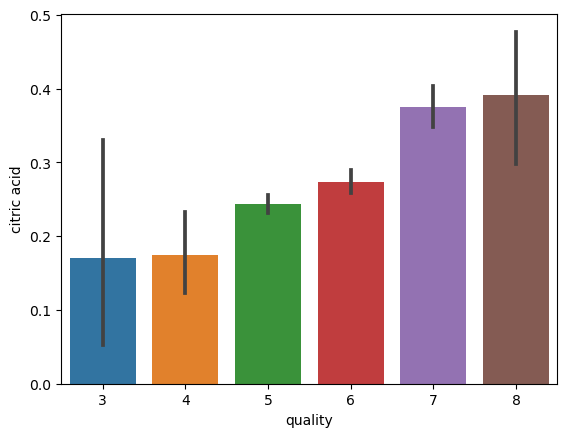

In [18]:
sns.barplot(x="quality", y="citric acid", data = df)

comparsion of citric acid and quality shows us high the citric acid leads to the better quality of wine in this where 7 and 8 are the highest.

<Axes: >

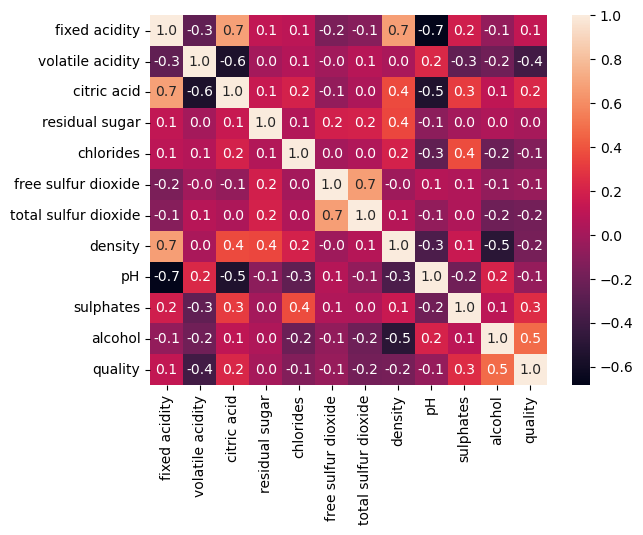

In [19]:
sns.heatmap(df.corr(),annot=True,fmt=".1f")

In [20]:
x = df.drop("quality", axis = 1)
x

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


spliting the data in x and y where as x is input variable and y is target variable.

In [21]:
y = df["quality"].apply(lambda y_value: 1 if y_value>= 7 else 0)
y

0       0
1       0
2       0
3       0
4       0
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: quality, Length: 1599, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size = 0.20, random_state = 3)

In [24]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1279, 11), (320, 11), (1279,), (320,))

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [26]:
rfc = RandomForestClassifier()

In [27]:
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [28]:
pred = rfc.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [29]:
print(accuracy_score(y_test,pred))

0.93125


In [30]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x,y)
s = etc.feature_importances_
print(s)

[0.07742987 0.10218498 0.09317392 0.07637922 0.07031906 0.06818514
 0.08196024 0.08535741 0.07099995 0.10722995 0.16678025]


From this we get clear picture which column from input variable is more  involved to get an better quality of wine.

In [31]:
from sklearn.linear_model import LogisticRegression 
lg = LogisticRegression()

In [32]:
lg.fit(x_train,y_train)

LogisticRegression()

In [33]:
pred = lg.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,

In [34]:
print(accuracy_score(y_test,pred))

0.89375


In [35]:
from sklearn.svm import SVC
s = SVC()

In [36]:
s.fit(x_train,y_train)

SVC()

In [37]:
pred = s.predict(x_test)
pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [38]:
print(accuracy_score(y_test,pred))

0.884375


In [39]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()

In [40]:
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [41]:
pred= dtc.predict(x_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,

In [42]:
print(accuracy_score(y_test,pred))

0.915625


In [43]:
from sklearn.naive_bayes import GaussianNB
G = GaussianNB()
G.fit(x_train,y_train)

GaussianNB()

In [44]:
pred = G.predict(x_test)
pred

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,

In [45]:
print(accuracy_score(y_test,pred))

0.85625


As we have tried using many model to find out the better quality of wine,
we have got highest and the best result of 0.934375 from RandomForestClassifier,
whereas,
GaussianNB gives us 0.85625,
DecisionTreeClassifier gives us 0.90625 and the second best after RandomForestClassifier,
SVC gives us 0.884375,
LogisticRegression gives us 0.89375.

In [46]:
data = (7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = rfc.predict(data_reshaped)
print(prediction)

[1]


In [47]:
if (prediction[0]==1):
    print("Good Qualty Wine")
else:
    print("Bad Qaulity Wine")

Good Qualty Wine


Prediction model to give result on the basis of input variables model is showing quality of wine is Good or Bad.

# Medical cost personal insurance

In [48]:
df1 = pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [49]:
df1.shape
print('Number of Rows',df1.shape[0])
print("Number of Columns",df1.shape[1])

Number of Rows 1338
Number of Columns 7


In this data we have total 07 columns from which charges column is an output an target variable and the remaining columns are input variable on the basis of that we need to create an model which will predict the charges as per the given input to the model.

In [50]:
df1.sample(15)

,age,sex,bmi,children,smoker,region,charges
178,46,female,28.900,2,no,southwest,8823.27900
510,56,male,32.110,1,no,northeast,11763.00090
731,53,male,21.400,1,no,southwest,10065.41300
686,42,male,26.125,2,no,northeast,7729.64575
337,62,male,27.550,1,no,northwest,13937.66650
311,19,female,24.700,0,no,southwest,1737.37600
145,29,female,38.830,3,no,southeast,5138.25670
1001,24,male,32.700,0,yes,southwest,34472.84100
1119,30,female,19.950,3,no,northwest,5693.43050
368,44,male,32.015,2,no,northwest,8116.26885


In [51]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [52]:
df1.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [53]:
df1.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

This dataset do not have any null value, same is been checked using isnull, and also checked with using head, tail, and sample.

In [54]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<Axes: >

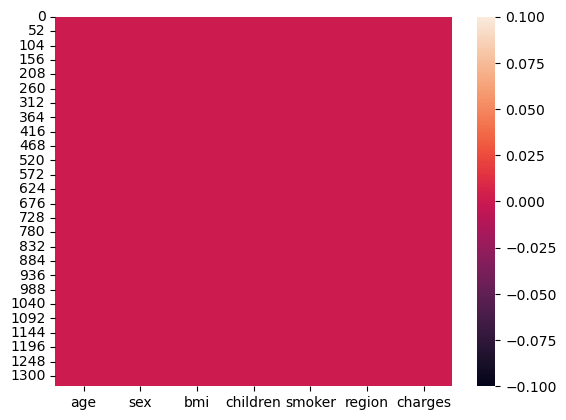

In [55]:
sns.heatmap(df1.isnull())

In [56]:
df1.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


Description on this dataset is only worked on columns which have numerical data as the rest of the columns have categorical data present. 

In [57]:
df1['sex'].unique()

array(['female', 'male'], dtype=object)

In [58]:
df1['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [59]:
df1['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [60]:
df1["sex"].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [61]:
df1["smoker"].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [62]:
df1["region"].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

We have calculated the unique values of the columns with there value counts which are (sex),(smoker) and (region)

In [63]:
df1["sex"] = df1['sex'].map({'female':0,"male":1})
df1["smoker"] = df1["smoker"].map({"no":0, "yes":1})
df1['region'] = df1["region"].map({"southwest":0, "southeast":1, "northwest":2, "northeast":3})

In [64]:
df1.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


Categorical data which is present in this dataset has been converted into numerical data for further analysis. Same has been checked with the head which will result 05 rows by default.

In [65]:
df1.describe()

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.484305,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,1.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [66]:
x = df1.drop(["charges"], axis= 1)
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,1
1336,21,0,25.800,0,0,0


In [67]:
y = df1["charges"]
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

Spliting the data into x and y, where x is input data and y is output(charges).

In [68]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [69]:
x_train.shape , x_test.shape , y_train.shape , y_test.shape

((1070, 6), (268, 6), (1070,), (268,))

Taking the data into training and testing for further analysis. 20% of the data is been used for testing.

In [70]:
from sklearn.linear_model import LinearRegression
lg = LinearRegression()
lg.fit(x_train, y_train)

LinearRegression()

In [71]:
pred_lg = lg.predict(x_test)
pred_lg

array([ 8924.40724442,  7116.29501758, 36909.01352144,  9507.87469118,
       27013.3500079 , 10790.77956153,   226.29844571, 16942.71599941,
        1056.63079407, 11267.91997309, 28048.59793155,  9424.36324087,
        5326.32232088, 38460.06017922, 40303.40597026, 37147.01010262,
       15287.91876684, 35965.05485917,  9179.1753067 , 31510.8319849 ,
        3797.79068365, 10070.82803304,  2312.57551348,  7074.41348194,
       11352.37224357, 12907.77079523, 14448.84678727,  6205.65997921,
        9917.00839638,  2239.50032819,  9060.55469043, 13120.56214535,
        4617.70702822,  3467.91218926,  4402.74821855, 12967.91608907,
        1927.44498944,  8757.9180081 , 33324.35180597, 32638.47697026,
        3852.41756615,  4370.39670883, 14080.76023234, 11478.63402576,
        8829.26135924, 12046.15119133,  5322.80515731,  3100.71182484,
       35546.60547574,  9201.61196817, 15894.23763341,  2406.04003607,
       12397.52052544,  1433.90617387, 13448.14094304, 12519.54174599,
      

In [72]:
from sklearn.svm import SVR
svm = SVR()
svm.fit(x_train, y_train)

SVR()

In [73]:
pred_svm = svm.predict(x_test)
pred_svm

array([9548.50178351, 9493.25302703, 9648.29711584, 9555.22301389,
       9421.4745596 , 9491.65789611, 9421.47082652, 9650.82593869,
       9452.95440484, 9576.07092142, 9459.24126891, 9525.22321805,
       9454.75937966, 9562.46322596, 9635.57195476, 9567.87667103,
       9580.12098323, 9567.2040892 , 9556.52939396, 9536.57882424,
       9438.59049243, 9539.27237007, 9420.56963138, 9436.82307271,
       9581.90959301, 9607.6878757 , 9637.0340662 , 9446.35316436,
       9562.19275496, 9418.4361968 , 9518.12321514, 9623.02508021,
       9428.13589597, 9460.08095175, 9441.8177803 , 9555.51906381,
       9424.67032729, 9537.84327119, 9591.11124324, 9496.52209816,
       9421.17895622, 9428.45855873, 9618.79897398, 9628.06800372,
       9479.38723507, 9629.7175251 , 9427.18243121, 9437.77982428,
       9541.26893753, 9471.16912085, 9648.1624683 , 9418.17487558,
       9525.16373786, 9418.34084427, 9618.72227059, 9584.12941898,
       9458.93497653, 9468.02085376, 9628.01534217, 9602.29755

In [74]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(x_train, y_train)

RandomForestRegressor()

In [75]:
pred_rfr = rfr.predict(x_test)
pred_rfr

array([10615.9711192 ,  5284.45213788, 28285.09403   , 10051.2579035 ,
       34494.225146  ,  9743.7059087 ,  2123.087355  , 14261.155543  ,
        5673.1923547 , 11058.6375946 , 19574.2021111 ,  7279.9069825 ,
        4800.179214  , 46043.4278661 , 48483.9634398 , 45487.7805934 ,
        9797.0979676 , 43117.3916391 ,  9020.422609  , 24531.5479281 ,
        5369.1423323 , 10008.2370008 ,  2847.160129  ,  2764.4275445 ,
       11822.3700138 , 11753.3954184 , 13383.2800327 ,  6556.7706028 ,
       10661.1420024 ,  3788.05159677,  7625.604969  , 11855.2024667 ,
        2885.6590233 ,  5715.8342827 ,  3095.360105  , 12171.4176586 ,
        2633.1927507 ,  7626.7907089 , 23627.661774  , 39176.4124905 ,
        5898.2709626 ,  3707.2458699 , 13498.6003858 , 14049.7477919 ,
        5732.1998836 , 15064.060485  , 17723.0068631 ,  6217.0509939 ,
       42366.1721536 ,  5786.6002106 , 13868.9256995 ,  1845.9423468 ,
        6781.6943097 ,  1722.7518665 , 12218.9745519 , 11205.1739181 ,
      

In [76]:
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(x_train,y_train)

GradientBoostingRegressor()

In [77]:
pred_gbr = gbr.predict(x_test)
pred_gbr

array([11001.12862914,  5840.17465641, 28001.98011231,  9745.29160234,
       33639.10098055,  5369.92652553,  2686.29056393, 15046.07464454,
        4994.85131313, 10957.88042886, 17766.44458901,  8365.385008  ,
        5055.67312101, 45622.23266103, 47411.65850381, 45576.58593453,
       11195.43361106, 45132.36857925,  9580.43055912, 23723.29586167,
        5228.47013552,  8746.80575188,  1924.63761923,  4799.00604527,
       11595.00317157, 13121.09517975, 14878.79602155,  7135.68339139,
       11632.21368307,  2841.24796549,  7540.56941629, 12353.02378534,
        2901.28480096,  6064.83381499,  4361.93487269, 10356.77159502,
        3716.08676581,  8865.83029843, 25176.14875928, 40188.36947277,
        7232.99011336,  4216.54944186, 13539.06820856, 14553.81716615,
        8082.74795145, 15559.51576918,  6911.86851442,  6434.99507328,
       42777.7605688 ,  6159.59976937, 14908.12302782,  2776.49845439,
        6668.3383643 ,  2299.71425822, 12298.48065279, 11261.23777381,
      

Using different models to get the result, we have used LinearRegression, SuperVectorMachine(SVM), RandomForestRegressor and GradientBoostingRegressor further taken the result of the model into an DataFrame.

In [78]:
samp = pd.DataFrame({"Actual":y_test,
                    "LR":pred_lg,
                    "SVM":pred_svm,
                     "RFR":pred_rfr,
                    "GBR":pred_gbr})
samp

,Actual,LR,SVM,RFR,GBR
764,9095.06825,8924.407244,9548.501784,10615.971119,11001.128629
887,5272.17580,7116.295018,9493.253027,5284.452138,5840.174656
890,29330.98315,36909.013521,9648.297116,28285.094030,28001.980112
1293,9301.89355,9507.874691,9555.223014,10051.257903,9745.291602
259,33750.29180,27013.350008,9421.474560,34494.225146,33639.100981
...,...,...,...,...,...
109,47055.53210,39116.968669,9648.419534,46977.876895,45431.423211
575,12222.89830,11814.555568,9625.047904,12687.423441,12465.025294
535,6067.12675,7638.107736,9504.805678,6441.737543,6974.336525
543,63770.42801,40959.081722,9604.855076,46813.628815,47862.047791


<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

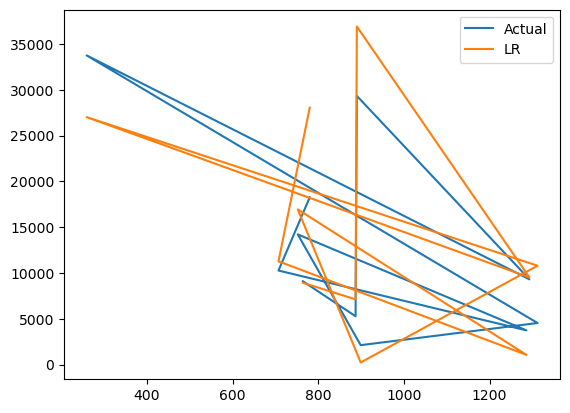

In [79]:
plt.subplot(111)
plt.plot(samp["Actual"].iloc[0:11], label="Actual")
plt.plot(samp['LR'].iloc[0:11], label = "LR")
plt.legend()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

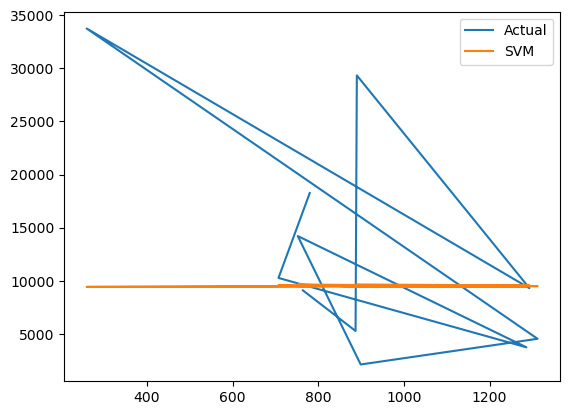

In [80]:
plt.subplot(111)
plt.plot(samp["Actual"].iloc[0:11], label="Actual")
plt.plot(samp['SVM'].iloc[0:11], label = "SVM")
plt.legend()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

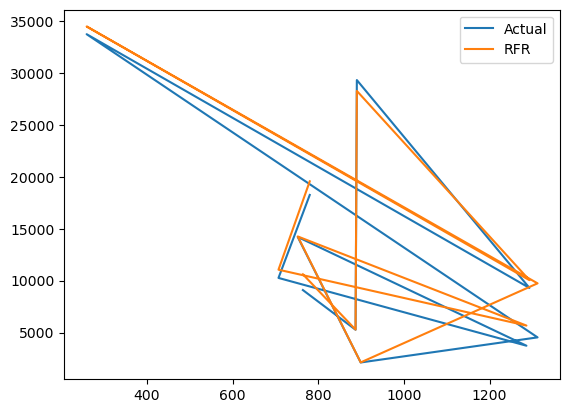

In [81]:
plt.subplot(111)
plt.plot(samp["Actual"].iloc[0:11], label="Actual")
plt.plot(samp['RFR'].iloc[0:11], label = "RFR")
plt.legend()
plt.tight_layout

<function matplotlib.pyplot.tight_layout(*, pad=1.08, h_pad=None, w_pad=None, rect=None)>

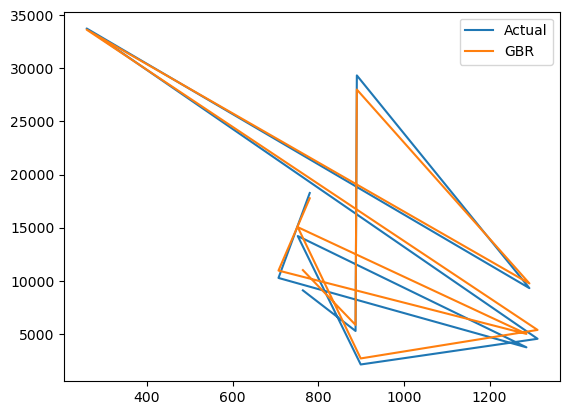

In [82]:
plt.subplot(111)
plt.plot(samp["Actual"].iloc[0:11], label="Actual")
plt.plot(samp['GBR'].iloc[0:11], label = "GBR")
plt.legend()
plt.tight_layout

Plotting result of each of the model where we can see GradientBoostingRegressor is giving more accurate output than other models.

In [83]:
from sklearn import metrics

In [84]:
# getting score using r2_score

In [85]:
score_lr = metrics.r2_score(y_test,pred_lg)
score_lr

0.7833463107364539

In [86]:
score_svm = metrics.r2_score(y_test,pred_svm)
score_svm

-0.07230841842488811

In [87]:
score_rfr = metrics.r2_score(y_test,pred_rfr)
score_rfr

0.8627394833837759

In [88]:
score_gbr = metrics.r2_score(y_test,pred_gbr)
score_gbr

0.8779726251291786

Here we have used R-squared method to get the score in which GradientBoostingRegressor have given the highest result of 0.8779726251291786 and second best is RandomForestRegressor giving score of 0.8622930097749669 

In [89]:
# using mean_absolute_error, lower the score better the result

In [90]:
s1 = metrics.mean_absolute_error(y_test,pred_lg)
s1

4186.508898366434

In [91]:
s2 = metrics.mean_absolute_error(y_test,pred_svm)
s2

8592.79866979489

In [92]:
s3 = metrics.mean_absolute_error(y_test,pred_rfr)
s3

2522.729580225219

In [93]:
s4 = metrics.mean_absolute_error(y_test,pred_gbr)
s4

2447.9515580545844

Further we have used mean_absolute_error where lower the score better the result.

In [94]:
data = (57,0,28.785,4,0,3)
data_as_np_array = np.asarray(data)
data_reshaped = data_as_np_array.reshape(1,-1)
prediction = gbr.predict(data_reshaped)
print("The Insurance cost is USD :",prediction)

The Insurance cost is USD : [15089.23883403]


Created an model which will predict the charges on the basis of given input, Here tested the model by giving certian input values to the model where (age is 57), (sex is 0 which is female), (bmi is 28.785), (children is 4), (region is 0 which is southwest) on the basis of this input model have predict the charges to be 15089.23883403 USD. 